In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib

import GaussianODEs as ode
importlib.reload(ode)

<module 'GaussianODEs' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianODEs.py'>

In [2]:
mu = 20
sigma = 100
mu0 = 0
sigma0 = 1

## KL

In [3]:
discr = 100
gamma = 0.1
mean_eq_wfrinf, var_eq_wfrinf, kl_wfrinf = ode.wfr_infinite_time(mu0, mu, sigma0, sigma, discr, gamma)

In [19]:
t = np.arange(discr+1)*gamma
kl0 = ode.KL(mu0, sigma0, mu, sigma)
delta = 0.1
conjecture_bound = kl0*np.exp(-t*((2-3*delta)+2/sigma))
w_bound = kl0*np.exp(-2*t*1/sigma)
B = np.maximum(sigma0+mu0**2, sigma+mu**2)
M = np.abs(((sigma0-sigma)/(2*sigma0*sigma)))*np.maximum(2, 
                  (mu0*sigma-mu*sigma0)**2/(sigma0-sigma)**2
                   +(mu0**2*sigma-mu**2*sigma0)/(sigma0-sigma)
                   + sigma0*sigma*np.log(sigma/sigma0)/(sigma0-sigma))
fr_bound = M*(2+B+B*np.exp(M*(1+B)*np.exp(-t)))*np.exp(-t)
min_bound = np.minimum(w_bound, fr_bound)

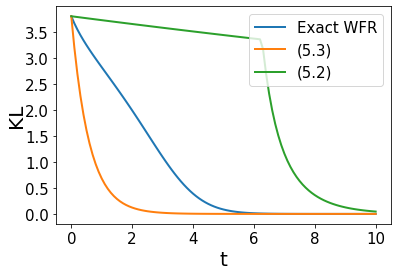

In [20]:
plt.plot(t, kl_wfrinf, label = 'Exact WFR', linestyle = 'solid', lw = 2)
plt.plot(t, conjecture_bound, label = '(5.3)', linestyle = 'solid', lw = 2)
plt.plot(t, min_bound, label = '(5.2)', linestyle = 'solid', lw = 2)
# plt.plot(w_bound)
# plt.plot(fr_bound)
plt.legend(fontsize = 15, loc = 'upper right')
plt.xlabel('t', fontsize = 20)
plt.ylabel('KL', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.savefig('kl_rate.pdf', bbox_inches="tight")

## Symmetrised KL

In [6]:
j0 = ode.KL(mu0, sigma0, mu, sigma)+ode.KL(mu, sigma, mu0, sigma0)

In [7]:
j_wfr = ode.KL(mean_eq_wfrinf, var_eq_wfrinf, mu, sigma)+ode.KL(mu, sigma, mean_eq_wfrinf, var_eq_wfrinf)
kappa = 1+2*np.minimum(1/sigma, 1/var_eq_wfrinf)
conv_bound1 = j0*np.exp(-t*kappa)

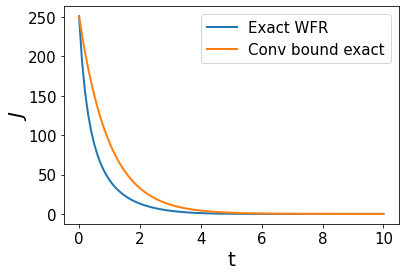

In [8]:
plt.plot(t, j_wfr, label = 'Exact WFR', linestyle = 'solid', lw = 2)
plt.plot(t, conv_bound1, label = 'Conv bound exact', linestyle = 'solid', lw = 2)
# plt.plot(t, min_bound, label = '(5.2)', linestyle = 'solid', lw = 2)
# plt.plot(w_bound)
# plt.plot(fr_bound)
plt.legend(fontsize = 15, loc = 'upper right')
plt.xlabel('t', fontsize = 20)
plt.ylabel('$J$', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);